## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
random_data = np.random.random((20, 2))
X = np.array(random_data[:, 0])
def assmuing_function(x):
    return 13.4 * x + 5 + np.random.randint(-5, 5)
y = np.array([assmuing_function(x) for x in X])

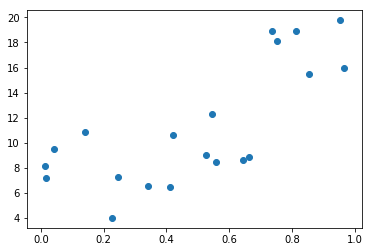

In [3]:
plt.scatter(X, y)

In [4]:
class MyLinearReg:

    def __init__(self):

        self.X = None
        self.Y = None
        self.coef_ = 0
        self.intercept_ = 0

    def fit(self,x,y):

        self.X = np.array(x).reshape(-1)
        self.Y = np.array(y).reshape(-1)
        assert(x.shape==y.shape)
        self.X_mean = np.sum(self.X)/self.X.shape[0]
        self.Y_mean = np.sum(self.Y)/self.Y.shape[0]
        #calculate the coeficient and the interception parameter.
        self.coef_ = np.dot((self.X-self.X_mean),(self.Y-self.Y_mean))/np.dot((self.X-self.X_mean),(self.X-self.X_mean))
        self.intercept_ = self.Y_mean-self.coef_*self.X_mean

        return (self.coef_,self.intercept_)

    def predict(self,x):

        return self.coef_*np.array(x)+self.intercept_

    def plot(self):

        if (self.X.any() != None) or (self.Y.any() != None):
            plt.scatter(self.X,self.Y)
        plt.plot(X, self.predict(X), color='red')
        

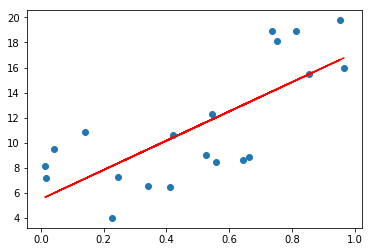

In [5]:
reg=MyLinearReg()
reg.fit(X, y)
reg.plot()

In [6]:
random_data = np.random.random((20, 2))
x = np.array(random_data[:, 0])
reg.predict(x)

array([14.28485476,  5.58959204,  7.39765621,  8.20761774,  5.89361776,
       15.44359895,  9.5815387 , 12.68537842, 15.68285763, 10.58903192,
       16.63936691, 15.79696237,  5.53116346, 15.00146729, 11.93088951,
       13.39190566, 12.15230378, 10.77351203,  8.7852796 , 11.659572  ])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [7]:
class MyKnn:
    def __init__(self,x,y):
        self.data = [(Xi, yi) for Xi, yi in zip(x, y)]
        self.input_point=[]
    def _distance(self,x1,x2):
        return np.abs(x1-x2)

    def predict(self,x,k=5):
        most_similars = sorted(self.data, key=lambda xi: self._distance(xi[0], x))[:k]
        y = np.mean(np.array([yi[1] for yi in most_similars]))
        self.input_point.append((x,y))
        return y

    def plot(self):
        
        x=[n[0] for n in self.data]
        y=[n[1] for n in self.data]
        plt.scatter(x,y)
        if  len(self.input_point) > 0:
            x_input=[n[0] for n in self.input_point]
            y_predict=[n[1] for n in self.input_point]
            plt.scatter(x_input,y_predict,color='red')


In [8]:
myknn= MyKnn(X,y)

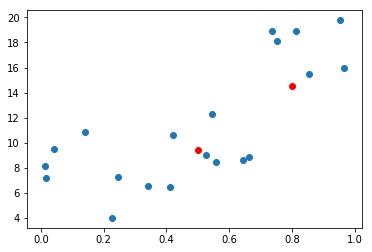

In [9]:
myknn.predict(0.5,k=5)
myknn.predict(0.8,k=10)
myknn.plot()

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [10]:
from icecream import ic
import pandas as pd
from collections import Counter
from collections import defaultdict

In [172]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    #'pet': [1, 1, 1, 0, 1, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)

In [12]:
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    #ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [109]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str):
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        #ic(f)
        values = set(training_data[f])
        #ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            #ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            #ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            #ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    #print('spliter is: {}'.format(spliter))
    #print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [110]:
spliter=find_the_optimal_spilter(training_data=dataset, target='bought')

In [111]:
def split_data(original_data: pd.DataFrame, spliter):
    splited_data = original_data[original_data[spliter[0]] == spliter[1]]
    remain_data = original_data[original_data[spliter[0]] != spliter[1]]
    return (splited_data,remain_data)

In [112]:
splited_data,remain_data=split_data(dataset, spliter)

In [113]:
def is_terminal_set(data: pd.DataFrame,target: str):
    if len(data) > 0 :
        if len(set(data[target].values)) > 1 :
            x_fields = set(data.columns.tolist()) - {target}
            for f in x_fields:
                if len(set(data[f].values)) >1 :
                    return False
                else:
                    return True
        else:
            return True
    else:
        return True

In [114]:
is_terminal_set(pd.DataFrame(),'bought')

True

In [175]:
class DecisionTree():
    def __init__(self,data,target):
        self.tree=defaultdict(list)
        self.target=target
        self._next_data=[data]
        self._next_spliter=[find_the_optimal_spilter(data, self.target)]
    def train(self):

        while(len(self._next_spliter)>0):
            current_data=self._next_data.pop(0)
            current_spliter=self._next_spliter.pop(0)
            splited_data=split_data(current_data,current_spliter)
            
            if not is_terminal_set(current_data,self.target) :
                for data in splited_data:
                    #print(data)
                    if is_terminal_set(data,self.target):
                        #print(self.tree)
                        prediction=Counter(data[self.target]).most_common()[0][0]
                        self.tree[current_spliter]+=[prediction]
                    else:
                        self._next_data+=[data]
                        if  find_the_optimal_spilter(data,self.target) ==current_spliter  :
                            prediction=Counter(data[self.target]).most_common()[0][0]
                            self.tree[current_spliter]+=[prediction]
                        elif find_the_optimal_spilter(data,self.target) !=current_spliter:
                            self._next_spliter+=[find_the_optimal_spilter(data,self.target)]
                            self.tree[current_spliter]+=[find_the_optimal_spilter(data,self.target)]
                        else:
                            pass


    def predict(self,x: pd.DataFrame):
        if len(self.tree) ==0 :
            return None
        else:
            current_spliter=list(self.tree.keys())[0]
            #print('current_spliter is: {}'.format(current_spliter))
            while(current_spliter in self.tree.keys()):
                current_feature,current_value= current_spliter
                #print('x[current_feature] is: {}'.format(x[current_feature]))
                #print('current_feature is: {}'.format(current_feature))
                #print('current_value is: {}'.format(current_value))
                if (x[current_feature].item() == current_value) :
                    current_spliter=self.tree[current_spliter][0]
                else:
                    current_spliter=self.tree[current_spliter][1]
            return current_spliter

In [176]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [178]:
tree=DecisionTree(dataset,'gender')
tree.train()
print(tree.tree)
tree.predict(dataset[1:2])

defaultdict(<class 'list'>, {('bought', 1): ['F', 'M']})


'F'

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [181]:
from sklearn.cluster import KMeans
import random

In [182]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

In [183]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [192]:
cluster = KMeans(n_clusters=10, max_iter=500)
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [193]:
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)


In [194]:
cluster.cluster_centers_

array([[92.83333333, 85.66666667],
       [25.11111111, 19.38888889],
       [11.5       , 91.625     ],
       [76.28571429, 23.14285714],
       [38.44444444, 58.88888889],
       [83.83333333, 57.        ],
       [41.57142857, 92.42857143],
       [12.42857143, 63.85714286],
       [53.18181818, 39.81818182],
       [68.375     , 81.75      ]])

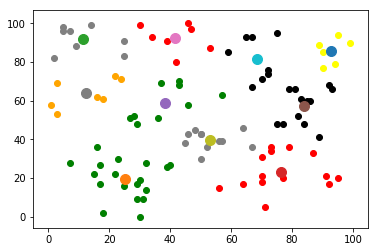

In [196]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i%len(color)])
        
for i,center in enumerate(cluster.cluster_centers_):
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 模型可以理解为一个具有待定参数的复杂函数，它可以根据现有的数据调整自身参数，以达到最符合训练数据的输入输出关系，从而实现对未知输入数据的推断。
每一个“定义好”的模型都有其局限性，针对不同的问题，应该选择适当的模型。会有这样的现象主要原因是人类的无能，或者是经验不足。利用模型预测结果是一个从已知到未知的推断，这样的推断在没有模型的时候是随机的，然而我们需要降低这样的随机性，就必须根据经验对模型进行一定程度的假设，将模型限定在发生概率较高的一个函数集合中，这样的作法提升了模型训练的效率，降低了对已知数据的依赖，但是牺牲的就是模型的泛化能力。

假设数据没有任何噪声时，一个足够复杂的模型总能够拟合出满足当下输入的结果，数据量有限的时候，复杂的模型很容易就可以组合出一组符合的函数。但由于模型过度复杂，数据量不足时，有很多可能的函数形式，这时拟合到的函数就很有可能离真实情况的函数比较远，形成过拟合。
而相反的，如果给模型加上太多的限制，反而将代表真实数据的函数排除在模型之外，如此数据再多都不可能拟合出正确的结果，形成欠拟合。
比如空间中一个点，总能找到直线穿越这个点，(over fitting)
但是两个点就只能找到一条直线穿过两个点了，(critical fitting)
三个点就只能找一条最接近的直线了。 (under fitting)

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

### Ans: see the previous answer.
### the reason could make model overfitting:
### 1.数据量太少 2.模型太复杂 
### the reason coult make model underfitting:
### 1.模型太简单

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

#### Ans:
#### precision: True positive / (True positive + False positive)
##### 肺炎阳性中有多少人真的得肺炎
#### recall: True positive / (True positive + False negative)
##### 得肺炎的人有多少人被验出来
#### AUC
##### ROC曲线下的面积，面积越大，分类器的效果越好
#### F1 Score  = $ \frac{2*precision*recall}{precision + recall} $
##### 由于precision和recall总是拮抗的，综合考量precision和recall的效果
#### $F_{\beta}$ $score = $ $(1+{\beta}^{2})$ $\frac{precision * recall}{({\beta})^{2}precision + recall}$
##### 比F1更侧重recall，可以忍受较小的precision，但recall 需要更高。

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: 构建一个数学模型，根据已知的数据与模型预测的好坏，调整自身的函数参数，使得模型对未知的输入数据能够做出更正确的判断

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

ans: 肯定正确啊，只是这一半是一大半还是一小半的问题吧。。。定义机器学习模型的评价标准，就像我们判断一个学生是否优秀，难道靠长相判断？总要出点题目来考考吧。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [198]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [207]:
def predicate(gender,income,family_number,model=DecisionTree(dataset,'bought')):
    input_data= {    'gender':           [gender]
                    ,'income':           [income]
                    ,'family_number':    [family_number]}
    model.train()
    return model.predict(pd.DataFrame(input_data))
    

In [208]:
predicate(gender='M',income=-10,family_number=1)
# you code here

1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

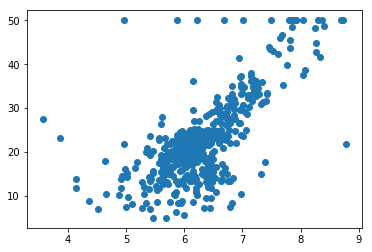

In [209]:
from sklearn.datasets import load_boston
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]
plt.scatter(X_rm,y)
# you code here

In [210]:
def price(rm, k, b):
    return k * rm + b

In [216]:
def loss(y,y_hat):
    return sum(np.abs((y_i - y_hat_i)) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))


In [241]:
#不是每个y_hat_i都大于y_i，所以要分点讨论吧？
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i > y_hat_i :
            gradient += -x_i
        elif y_i < y_hat_i:
            gradient +=  x_i
        else:
            gradient += 0
    return  gradient/n

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i >= y_hat_i :
            gradient += -1
        elif y_i < y_hat_i:
            gradient +=  1
        else:
            gradient += 0
    return  gradient/n

In [251]:
k = random.random() * 50 - 25  # -100 100
b = random.random() * 50 - 25  # -100 100

learning_rate = 0.1

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

 16.571673102454746, parameters k is 0.2472758991492945 and b is 4.414516158815848
Iteration 14, the loss is 12.729256841570704, parameters k is 0.8689713536947499 and b is 4.51333038806486
Iteration 15, the loss is 9.530740026629335, parameters k is 1.4440604841295333 and b is 4.604239478973951
Iteration 16, the loss is 7.433282443272506, parameters k is 1.9313788635761742 and b is 4.680524063954188
Iteration 17, the loss is 6.279418150956033, parameters k is 2.292915029584079 and b is 4.735860032333634
Iteration 18, the loss is 5.759554887130013, parameters k is 2.5543025789911935 and b is 4.774199953282251
Iteration 19, the loss is 5.651559074353022, parameters k is 2.6774055434180712 and b is 4.789614973045096
Iteration 20, the loss is 5.643655673293247, parameters k is 2.7214452667382294 and b is 4.791986514547073
Iteration 21, the loss is 5.6430172927063245, parameters k is 2.7289806422323006 and b is 4.788429202294108
Iteration 22, the loss is 5.642774311531654, parameters k is 

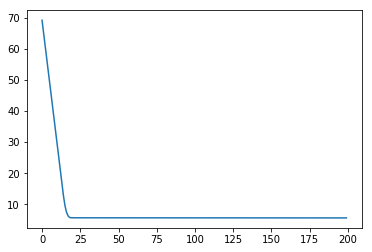

In [252]:
plt.plot(list(range(iteration_num)),losses)

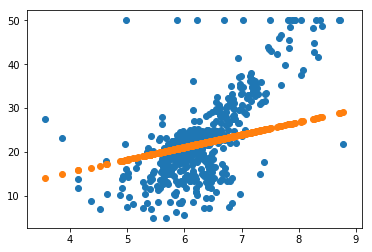

In [253]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)